## Goal:
 * For the given Songs info data, Estimate how much score can be given for a given song based on features taken. 


### Libraries:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

* importing required libraries

### 0.Data

* Song Popularity Score Predction
* data source: kaggle

In [3]:
#loading data
rawdata = pd.read_excel("Data_Train.xlsx",sheet_name="Data")

In [4]:
raw = rawdata

### 1.Basic Checks

In [5]:
raw.shape

(8000, 7)

shape of the data

In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SongLength      8000 non-null   float64
 1   NumInstruments  8000 non-null   int64  
 2   Genre           8000 non-null   object 
 3   Tempo           8000 non-null   float64
 4   LyricalContent  8000 non-null   float64
 5   ReleasedYear    8000 non-null   int64  
 6   Popularity      8000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 437.6+ KB


checking non null and data types of the data

In [7]:
raw.dtypes

SongLength        float64
NumInstruments      int64
Genre              object
Tempo             float64
LyricalContent    float64
ReleasedYear        int64
Popularity        float64
dtype: object

In [8]:
raw.head()

,SongLength,NumInstruments,Genre,Tempo,LyricalContent,ReleasedYear,Popularity
0,234.369261,4,Classical,84.774424,0.152603,2009,13.636534
1,343.876324,6,Jazz,65.486515,0.408796,1980,42.910689
2,305.973959,1,Jazz,164.752829,0.318433,1981,48.790880
3,158.897558,4,Pop,186.565004,0.680595,1984,68.362001
4,294.279271,4,Country,140.615871,0.969931,2015,86.969489


In [9]:
raw = raw.drop("ReleasedYear",axis='columns')

droping released year because it does not affect the data and output

In [10]:
print("first five rows of data")
display(raw.head())
print()
print("last five rows of data")
display(raw.tail())

first five rows of data


,SongLength,NumInstruments,Genre,Tempo,LyricalContent,Popularity
0,234.369261,4,Classical,84.774424,0.152603,13.636534
1,343.876324,6,Jazz,65.486515,0.408796,42.910689
2,305.973959,1,Jazz,164.752829,0.318433,48.790880
3,158.897558,4,Pop,186.565004,0.680595,68.362001
4,294.279271,4,Country,140.615871,0.969931,86.969489



last five rows of data


,SongLength,NumInstruments,Genre,Tempo,LyricalContent,Popularity
7995,398.120876,7,Classical,135.550681,0.101345,40.695441
7996,296.558875,7,Pop,133.586259,0.143948,27.898666
7997,227.407953,4,Classical,62.616766,0.142943,10.871648
7998,275.854318,5,Jazz,67.945166,0.182870,11.234010
7999,350.478488,5,Rock,193.569457,0.127300,41.938271


In [11]:
raw.Popularity.unique()

array([13.6365338 , 42.91068906, 48.79088022, ..., 10.87164838,
       11.23400958, 41.93827053])

checking whether the data is related to the column are not

In [12]:
raw.columns

Index(['SongLength', 'NumInstruments', 'Genre', 'Tempo', 'LyricalContent',
       'Popularity'],
      dtype='object')

Column|Info
------|---------
Song Length|Song time in sec
Num Instruments|Number of instruments used in the song
Genre|Musical style or category of the song.
Tempo|Speed of the song measured in beats per minute (BPM).
Lyrical Content|Proportion of positive words in the song's lyrics.
Popularity| Song popularity score

## 1.0 converting lower case:

* Converting text data columns into lower case,because python is case sensitive

In [13]:
for col in raw.columns:
    if raw[col].dtype=='object':
        raw[col] = raw[col].str.lower()

In [14]:
raw.head(2)

,SongLength,NumInstruments,Genre,Tempo,LyricalContent,Popularity
0,234.369261,4,classical,84.774424,0.152603,13.636534
1,343.876324,6,jazz,65.486515,0.408796,42.910689


### 1.1 Duplicate handling

In [15]:
raw[raw.duplicated()]

,SongLength,NumInstruments,Genre,Tempo,LyricalContent,Popularity


* there are no duplicates in this data

In [16]:
raw.isnull().sum()

SongLength        0
NumInstruments    0
Genre             0
Tempo             0
LyricalContent    0
Popularity        0
dtype: int64

* there are no null values in this data

### 2 .Column data validation(checking each and every column)

In [17]:
raw.head(2)

,SongLength,NumInstruments,Genre,Tempo,LyricalContent,Popularity
0,234.369261,4,classical,84.774424,0.152603,13.636534
1,343.876324,6,jazz,65.486515,0.408796,42.910689


### column = songlength

In [18]:
raw.SongLength.unique(),raw.SongLength.nunique()

(array([234.36926143, 343.87632418, 305.97395907, ..., 227.4079525 ,
        275.85431771, 350.47848821]),
 8000)

* Data is valid
* And there is need to be round off

In [19]:
raw.SongLength = raw.SongLength.round(2)

In [20]:
raw.head(5)

,SongLength,NumInstruments,Genre,Tempo,LyricalContent,Popularity
0,234.37,4,classical,84.774424,0.152603,13.636534
1,343.88,6,jazz,65.486515,0.408796,42.910689
2,305.97,1,jazz,164.752829,0.318433,48.790880
3,158.90,4,pop,186.565004,0.680595,68.362001
4,294.28,4,country,140.615871,0.969931,86.969489


### column =numinstruments

In [21]:
raw.NumInstruments.unique()

array([4, 6, 1, 3, 2, 5, 7, 8, 9], dtype=int64)

* data is valid
* And there is no need for any changes

### column = genre

In [22]:
raw.Genre.unique()

array(['classical', 'jazz', 'pop', 'country', 'rap', 'rock'], dtype=object)

* data is valid
* And there is no need for any changes

### column = tempo

In [23]:
raw.Tempo.nunique(),raw.Tempo.unique()

(8000,
 array([ 84.77442352,  65.48651503, 164.7528288 , ...,  62.61676636,
         67.9451655 , 193.56945717]))

* data is valid
* rounding of data for better usability

In [24]:
raw.Tempo = raw.Tempo.round(2)

### column = lyricalcontent

In [25]:
raw.LyricalContent.nunique(),raw.LyricalContent.unique()

(8000,
 array([0.15260329, 0.40879582, 0.3184329 , ..., 0.1429431 , 0.18287044,
        0.12730024]))

* data is valid
* rounding of data for better usability and converting into int

In [26]:
raw.LyricalContent = raw.LyricalContent*100

In [27]:
raw.LyricalContent = raw.LyricalContent.round(2)

rounding upto 2 points for better usability

In [28]:
raw.head(5)

,SongLength,NumInstruments,Genre,Tempo,LyricalContent,Popularity
0,234.37,4,classical,84.77,15.26,13.636534
1,343.88,6,jazz,65.49,40.88,42.910689
2,305.97,1,jazz,164.75,31.84,48.790880
3,158.90,4,pop,186.57,68.06,68.362001
4,294.28,4,country,140.62,96.99,86.969489


### Column: popularity

In [29]:
raw.describe()

,SongLength,NumInstruments,Tempo,LyricalContent,Popularity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,273.589485,4.940125,129.077701,49.915363,49.334637
std,71.708690,2.585754,39.988660,28.917961,21.296583
min,150.000000,1.000000,60.010000,0.000000,0.000000
25%,212.085000,3.000000,94.237500,25.037500,33.075306
50%,273.015000,5.000000,129.670000,49.570000,49.286768
75%,335.090000,7.000000,162.812500,75.105000,65.515098
max,399.930000,9.000000,199.970000,100.000000,100.000000


In [30]:
raw.Popularity.nunique(),raw.Popularity.unique()

(7967,
 array([13.6365338 , 42.91068906, 48.79088022, ..., 10.87164838,
        11.23400958, 41.93827053]))

In [31]:
raw.Popularity = raw.Popularity.round(2)

In [32]:
raw.Popularity

0       13.64
1       42.91
2       48.79
3       68.36
4       86.97
        ...  
7995    40.70
7996    27.90
7997    10.87
7998    11.23
7999    41.94
Name: Popularity, Length: 8000, dtype: float64

In [33]:
raw.dtypes

SongLength        float64
NumInstruments      int64
Genre              object
Tempo             float64
LyricalContent    float64
Popularity        float64
dtype: object

In [34]:
raw.head()

,SongLength,NumInstruments,Genre,Tempo,LyricalContent,Popularity
0,234.37,4,classical,84.77,15.26,13.64
1,343.88,6,jazz,65.49,40.88,42.91
2,305.97,1,jazz,164.75,31.84,48.79
3,158.90,4,pop,186.57,68.06,68.36
4,294.28,4,country,140.62,96.99,86.97


In [35]:
data = raw.copy()

# EDA

Numerical|categorical
---------|-----------
SongLength|Genre
NumInstruments|
Tempo|
LyricalContent|
ReleasedYear|
Popularity|

### Univariate analysis:

In [36]:
raw.describe()

,SongLength,NumInstruments,Tempo,LyricalContent,Popularity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,273.589485,4.940125,129.077701,49.915363,49.334610
std,71.708690,2.585754,39.988660,28.917961,21.296626
min,150.000000,1.000000,60.010000,0.000000,0.000000
25%,212.085000,3.000000,94.237500,25.037500,33.077500
50%,273.015000,5.000000,129.670000,49.570000,49.290000
75%,335.090000,7.000000,162.812500,75.105000,65.512500
max,399.930000,9.000000,199.970000,100.000000,100.000000


In [37]:
data =raw


Numerical Column: SongLength
Uni-Variate Descriptive Stats:
count    8000.0
mean      274.0
std        72.0
min       150.0
25%       212.0
50%       273.0
75%       335.0
max       400.0
Name: SongLength, dtype: float64
-----------------------------------------------------
Skewness & Kurtosis: 0.02546689110588894 , -1.1832301335522473

Visual Analysis:
-----------------------------------------------------


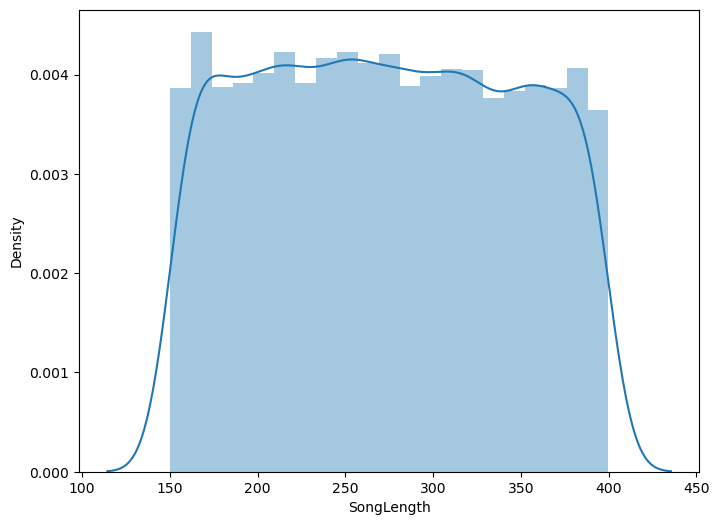


Categorical/Numeric Discrete Column: NumInstruments
Uni-Variate Descriptive Stats:
Classes: [4 6 1 3 2 5 7 8 9]
Number of Classes: 9
Value Counts of each class: NumInstruments
1    925
2    925
4    913
8    898
6    895
3    894
7    878
9    838
5    834
Name: count, dtype: int64
Class Percent:
NumInstruments
1    11.5625
2    11.5625
4    11.4125
8    11.2250
6    11.1875
3    11.1750
7    10.9750
9    10.4750
5    10.4250
Name: count, dtype: float64
---------------------------------------------------
Mode Value: 1

Visual Analysis:
-----------------------------------------------------


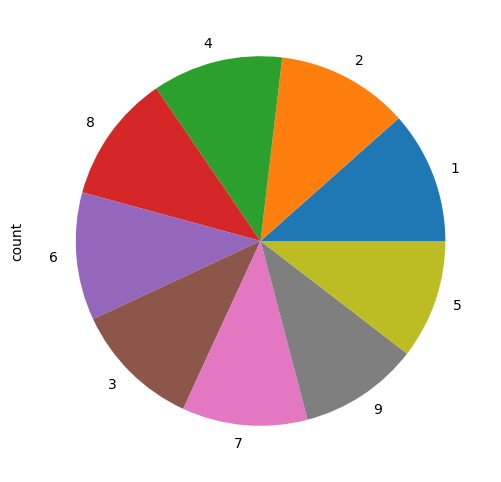


Categorical/Numeric Discrete Column: Genre
Uni-Variate Descriptive Stats:
Classes: ['classical' 'jazz' 'pop' 'country' 'rap' 'rock']
Number of Classes: 6
Value Counts of each class: Genre
country      1443
classical    1345
jazz         1332
rap          1305
pop          1302
rock         1273
Name: count, dtype: int64
Class Percent:
Genre
country      18.0375
classical    16.8125
jazz         16.6500
rap          16.3125
pop          16.2750
rock         15.9125
Name: count, dtype: float64
---------------------------------------------------
Mode Value: country

Visual Analysis:
-----------------------------------------------------


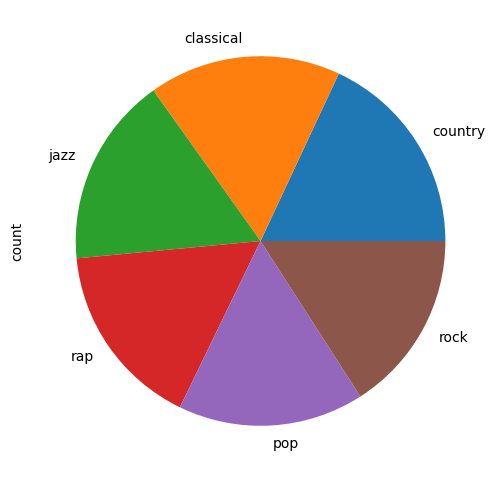


Numerical Column: Tempo
Uni-Variate Descriptive Stats:
count    8000.0
mean      129.0
std        40.0
min        60.0
25%        94.0
50%       130.0
75%       163.0
max       200.0
Name: Tempo, dtype: float64
-----------------------------------------------------
Skewness & Kurtosis: 0.019858074519129226 , -1.1913819607278366

Visual Analysis:
-----------------------------------------------------


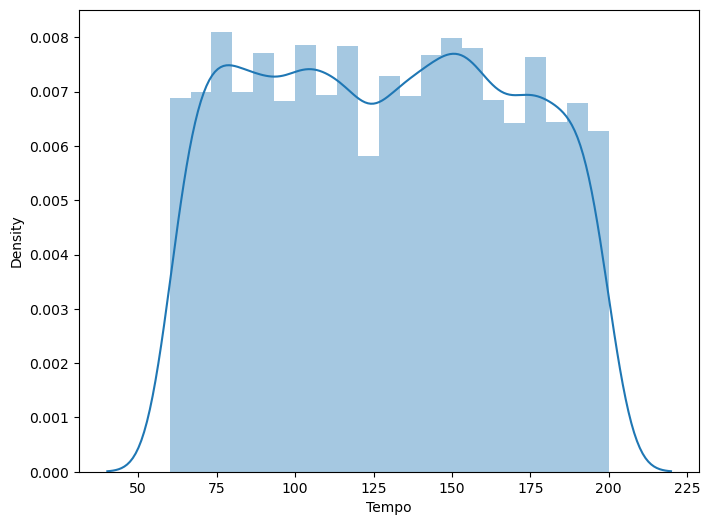


Numerical Column: LyricalContent
Uni-Variate Descriptive Stats:
count    8000.0
mean       50.0
std        29.0
min         0.0
25%        25.0
50%        50.0
75%        75.0
max       100.0
Name: LyricalContent, dtype: float64
-----------------------------------------------------
Skewness & Kurtosis: 0.02171690202852234 , -1.2031013100511385

Visual Analysis:
-----------------------------------------------------


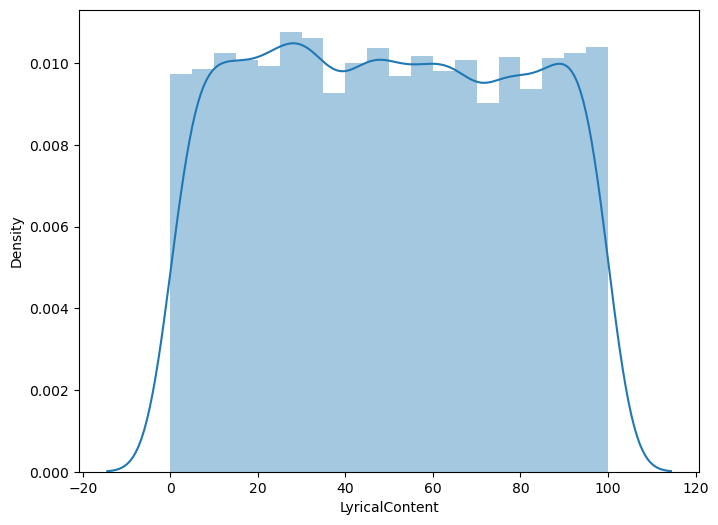


Numerical Column: Popularity
Uni-Variate Descriptive Stats:
count    8000.0
mean       49.0
std        21.0
min         0.0
25%        33.0
50%        49.0
75%        66.0
max       100.0
Name: Popularity, dtype: float64
-----------------------------------------------------
Skewness & Kurtosis: 0.015145933404296898 , -0.7210746290251353

Visual Analysis:
-----------------------------------------------------


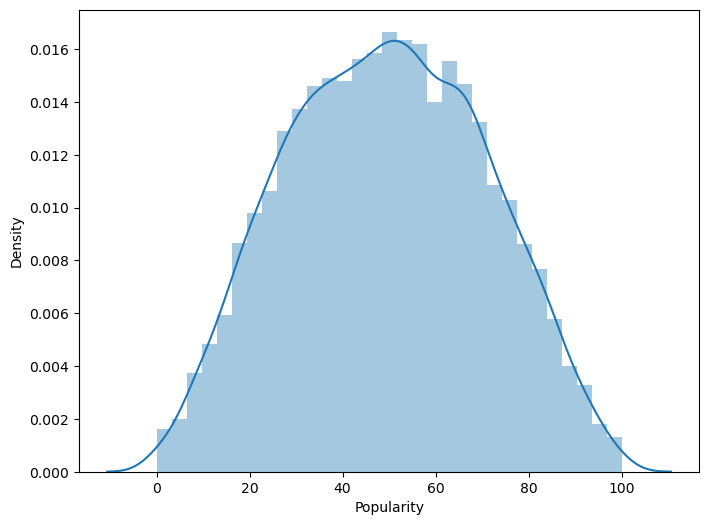

In [38]:
from simple_colors import *

for i in data.columns:
    if data[i].dtype == 'object' or data[i].dtype == 'int32' or data[
            i].dtype == 'int64':
        print()
        print(green("Categorical/Numeric Discrete Column:", ['bold']), i)
        print("=====================================================")
        print(green("Uni-Variate Descriptive Stats:", ['bold']))
        print(black("Classes:", ['bold']), data[i].unique())
        print(black("Number of Classes:", ['bold']), data[i].nunique())
        print(black("Value Counts of each class:", ['bold']),
              data[i].value_counts())
        print(black('Class Percent:', ['bold']))
        print((data[i].value_counts() / data[i].value_counts().sum()) * 100)
        print("---------------------------------------------------")
        print(black("Mode Value:", ['bold']), data[i].mode()[0])
        if data[i].nunique() <= 10:
            print()
            print(magenta("Visual Analysis:", ['bold']))
            print("-----------------------------------------------------")
            plt.figure(figsize=(8, 6))
            data[i].value_counts().plot(kind='pie')
            plt.show()

    elif data[i].dtype != 'object':
        print()
        print(blue("Numerical Column:", ['bold']), i)
        print("=====================================================")
        print(green("Uni-Variate Descriptive Stats:", ['bold']))
        print(round(data[i].describe(), ))
        print("-----------------------------------------------------")
        print(black("Skewness & Kurtosis:", ['bold']), data[i].skew(), ",",
              data[i].kurt())
        print()
        print(cyan("Visual Analysis:", ['bold']))
        print("-----------------------------------------------------")
        plt.figure(figsize=(8, 6))
        sns.distplot(data[i])
        #data[i].plot(kind = 'density')
        plt.show()

Insights
* minimum song length starts from 150 and maxes at 400
* avg song length ranges about 274
* song length follows normal distribution
* all no of instruments are used at an equal rate most no of instruments used are 1 & 2
* all genres are used at an equal rate max used genre is country
* popularity follows normal distribution of data 

### Bivarient analysis

bivarient analysis for following columns
* songlength-popularity
* numInstruments-popularity
* genre-popularity
* tempo-popularity
* lyricalcontent-popularity


In [39]:
data.head(5)

,SongLength,NumInstruments,Genre,Tempo,LyricalContent,Popularity
0,234.37,4,classical,84.77,15.26,13.64
1,343.88,6,jazz,65.49,40.88,42.91
2,305.97,1,jazz,164.75,31.84,48.79
3,158.90,4,pop,186.57,68.06,68.36
4,294.28,4,country,140.62,96.99,86.97


N-N

checking popularity correlation with other columns as popularity is the output coloumn 

In [40]:
data[['SongLength','Popularity']].corr()

,SongLength,Popularity
SongLength,1.000000,0.099737
Popularity,0.099737,1.000000


In [41]:
data[['NumInstruments','Popularity']].corr()

,NumInstruments,Popularity
NumInstruments,1.000000,0.059888
Popularity,0.059888,1.000000


In [42]:
data[['Tempo','Popularity']].corr()

,Tempo,Popularity
Tempo,1.000000,0.472338
Popularity,0.472338,1.000000


In [43]:
data[['LyricalContent','Popularity']].corr()

,LyricalContent,Popularity
LyricalContent,1.000000,0.845296
Popularity,0.845296,1.000000


lyricalcontent and popularity score are correlated around 84% 

<Axes: xlabel='LyricalContent', ylabel='Popularity'>

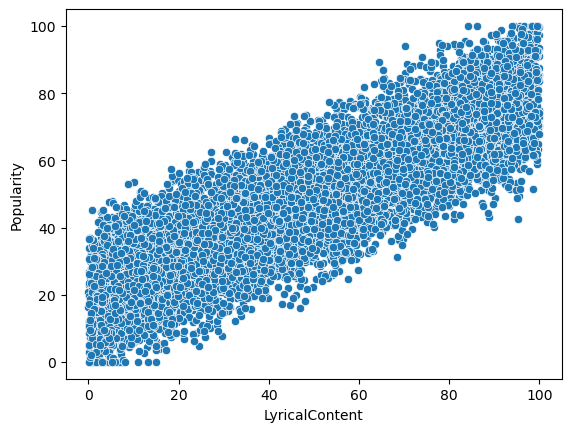

In [44]:
sns.scatterplot(data, x='LyricalContent', y='Popularity')

lyricalcontent vs popularity scatterplot shows scatter of each and every point on the graph

<Axes: >

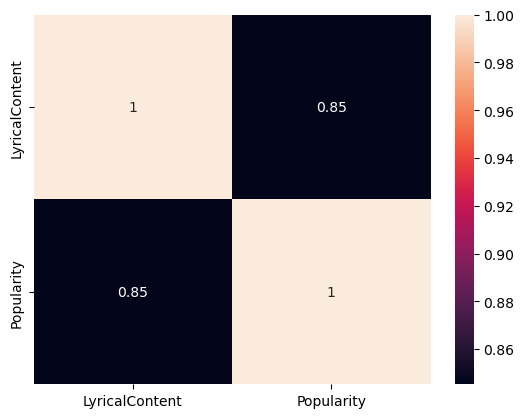

In [45]:
sns.heatmap(data[['LyricalContent', 'Popularity']].corr(), annot=True)

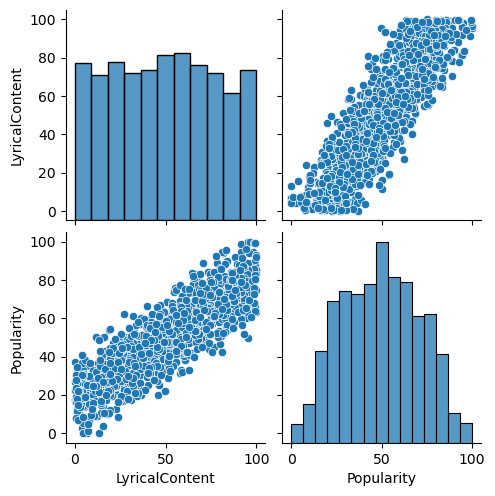

In [46]:
sns.pairplot(data[['LyricalContent', 'Popularity']].iloc[0:1000])

N-c

In [47]:
data.groupby('Genre')['Popularity'].mean()

Genre
classical    48.766149
country      50.006507
jazz         49.600368
pop          50.477273
rap          49.340138
rock         47.721163
Name: Popularity, dtype: float64

In [48]:
raw.head()

,SongLength,NumInstruments,Genre,Tempo,LyricalContent,Popularity
0,234.37,4,classical,84.77,15.26,13.64
1,343.88,6,jazz,65.49,40.88,42.91
2,305.97,1,jazz,164.75,31.84,48.79
3,158.90,4,pop,186.57,68.06,68.36
4,294.28,4,country,140.62,96.99,86.97


### Multivarient

**Multi Numeric**

<Axes: >

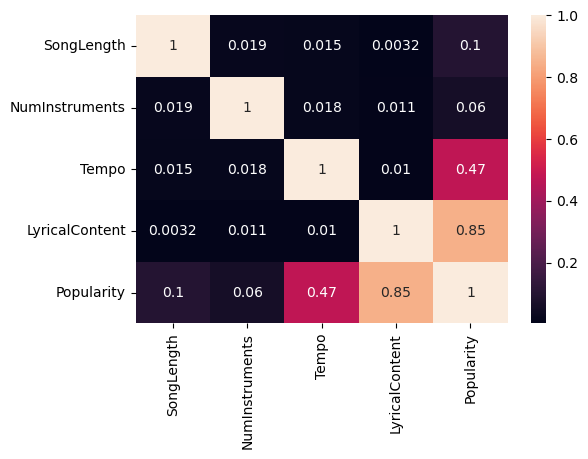

In [49]:
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(numeric_only = True), annot=True)

heat map shows correlation with tempo and lyricalcontent

In [50]:
data.corr(numeric_only = True)

,SongLength,NumInstruments,Tempo,LyricalContent,Popularity
SongLength,1.000000,0.019004,0.015297,0.003233,0.099737
NumInstruments,0.019004,1.000000,0.017591,0.010577,0.059888
Tempo,0.015297,0.017591,1.000000,0.010327,0.472338
LyricalContent,0.003233,0.010577,0.010327,1.000000,0.845296
Popularity,0.099737,0.059888,0.472338,0.845296,1.000000


* Tempo is moderatly correlated to popularity
* LyricalContent is highly related to popularity
* SongLength,NumInstruments and releasedyear  have no relation with popularity

Note:

    - greater than 0.7 is strong relation
    - 0.3 to 0.7  moderate relation
    - 0.3 or less weak/no relation

**Overall insigths on data **

* minimum song length starts from 150 and maxes at 400
* avg song length ranges about 274
* song length follows normal distribution
* all no of instruments are used at an equal rate most no of instruments used are 1 & 2
* all genres are used at an equal rate max used genre is country
* popularity follows normal distribution of data 
* Tempo is moderatly correlated to popularity
* LyricalContent is highly related to popularity
* SongLength,NumInstruments and releasedyear  have no relation with popularity

**Predictive Modeling**

### Predictive Modeling Steps

* Using sklearn pipeline process for the predictive modeling steps

In [51]:
# Base Library
from sklearn.pipeline import Pipeline

# Na Pipeline Library
from sklearn.impute import SimpleImputer

# Pre-Processing Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

### 3. Selecting X & y

In [52]:
X=data.drop("Popularity",axis=1)
y=data['Popularity']

### 4. Pipelines for X data

#### Pipeline Building

syntax:

    Pipeline(steps=[(pipename, pipesklearnfunction), ()...])

#### 4.1 Numerical Cols process Pipeline

In [53]:
numcols = list(X.select_dtypes(exclude='O'))

In [54]:
numcols

['SongLength', 'NumInstruments', 'Tempo', 'LyricalContent']

* There are no outliers,and missimg values

* Categorical columns-Genre 
* nominal

In [55]:
nominals = list(X[['Genre']].columns)

In [56]:
nominals

['Genre']

In [58]:
nominalpipe = Pipeline(steps=[('Ohe', OneHotEncoder(handle_unknown='ignore'))])

In [59]:
nominalpipe

Pipeline(steps=[('Ohe', OneHotEncoder(handle_unknown='ignore'))])

#### 4.3 Connecting pre-process pipelines

####  Applying Sklearn Column Transformations for the num & cat pipelines

In [60]:
# Column Transformer Library
from sklearn.compose import ColumnTransformer

In [61]:
preprocessingpipe = ColumnTransformer(transformers= [("nomcat", nominalpipe, nominals)], remainder="passthrough")

In [62]:
preprocessingpipe

ColumnTransformer(remainder='passthrough',
                  transformers=[('nomcat',
                                 Pipeline(steps=[('Ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Genre'])])

### 5. Final Pipeline

* Connecting Preprocess and ML Model pipelines

In [63]:
reg = Pipeline(steps=[('Preprocess',preprocessingpipe),('Regression',RandomForestRegressor())])

In [64]:
reg

Pipeline(steps=[('Preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nomcat',
                                                  Pipeline(steps=[('Ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Genre'])])),
                ('Regression', RandomForestRegressor())])

### 6. Modeling

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=123)

In [67]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((5600, 5), (2400, 5), (5600,), (2400,))

In [68]:
xtrain = xtrain.reset_index(drop=True)
ytrain = ytrain.reset_index(drop=True)
xtest = xtest.reset_index(drop=True)
ytest = ytest.reset_index(drop=True)

Model Training

In [69]:
reg.fit(xtrain,ytrain)

Pipeline(steps=[('Preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nomcat',
                                                  Pipeline(steps=[('Ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Genre'])])),
                ('Regression', RandomForestRegressor())])

import sklearn
sklearn.__version__

### 7. Evaluation of Model

Test

In [70]:
ypred = reg.predict(xtest)

In [71]:
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
round(np.sqrt(mean_squared_error(ytest, ypred)),2)

5.59

In [73]:
round(r2_score(ytest, ypred), 2)

0.93

Train



In [74]:
trainypred = reg.predict(xtrain)

In [75]:
round(np.sqrt(mean_squared_error(ytrain, trainypred)),2)

2.09

In [76]:
round(r2_score(ytrain, trainypred), 2)

0.99

### 8. Saving Trained Model for the Deployment

In [78]:
import joblib

# Pickled file

joblib.dump(reg, "songsdeployment.pkl")

['songsdeployment.pkl']